# **Neural networks**

*   Neural networks are built like simplified versions of the neural networks in our brains.
*   Each connection has a weight, which influences the strength of the signal between neurons.
*  Neural networks are typically organized in layers. There's an input layer that receives data, hidden layers that process the data, and an output layer that produces the results.


**Training and Improvement:**
*   Neural networks learn by being trained on data sets. During training, the weights of the connections between the neurons are adjusted.
*   This adjustment is based on how well the network performs on the training data.
*   The goal is to get the network to produce the desired output for a given input.









In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import random
import math
import warnings
warnings.filterwarnings('ignore')
tf.version

<module 'tensorflow._api.v2.version' from 'c:\\Users\\icycr\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()  # Upload the kaggle.json file

In [ ]:
!pip install -q kaggle


In [ ]:
# Set the path to the kaggle.json file
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle.json"



In [ ]:
# Authenticate with the Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()



In [ ]:
# Download the dataset
api.dataset_download_files('uraninjo/augmented-alzheimer-mri-dataset-v2')

# Densely Connected Neural network

**How does it work?**


*   In a densely connected layer, every neuron in one layer is connected to every neuron in the next layer. This creates a dense web of connections, allowing information to flow freely between all units.




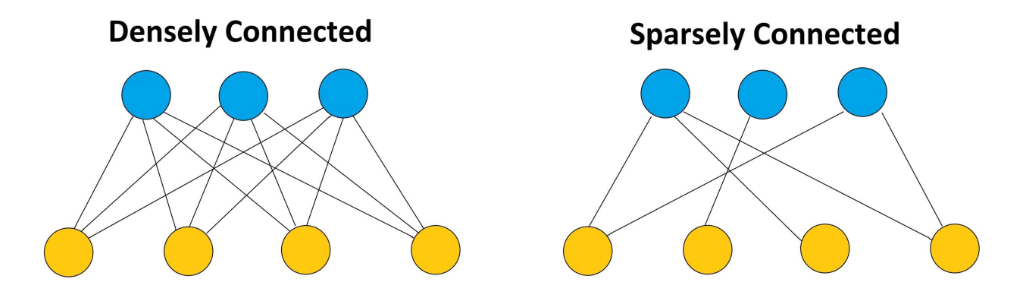


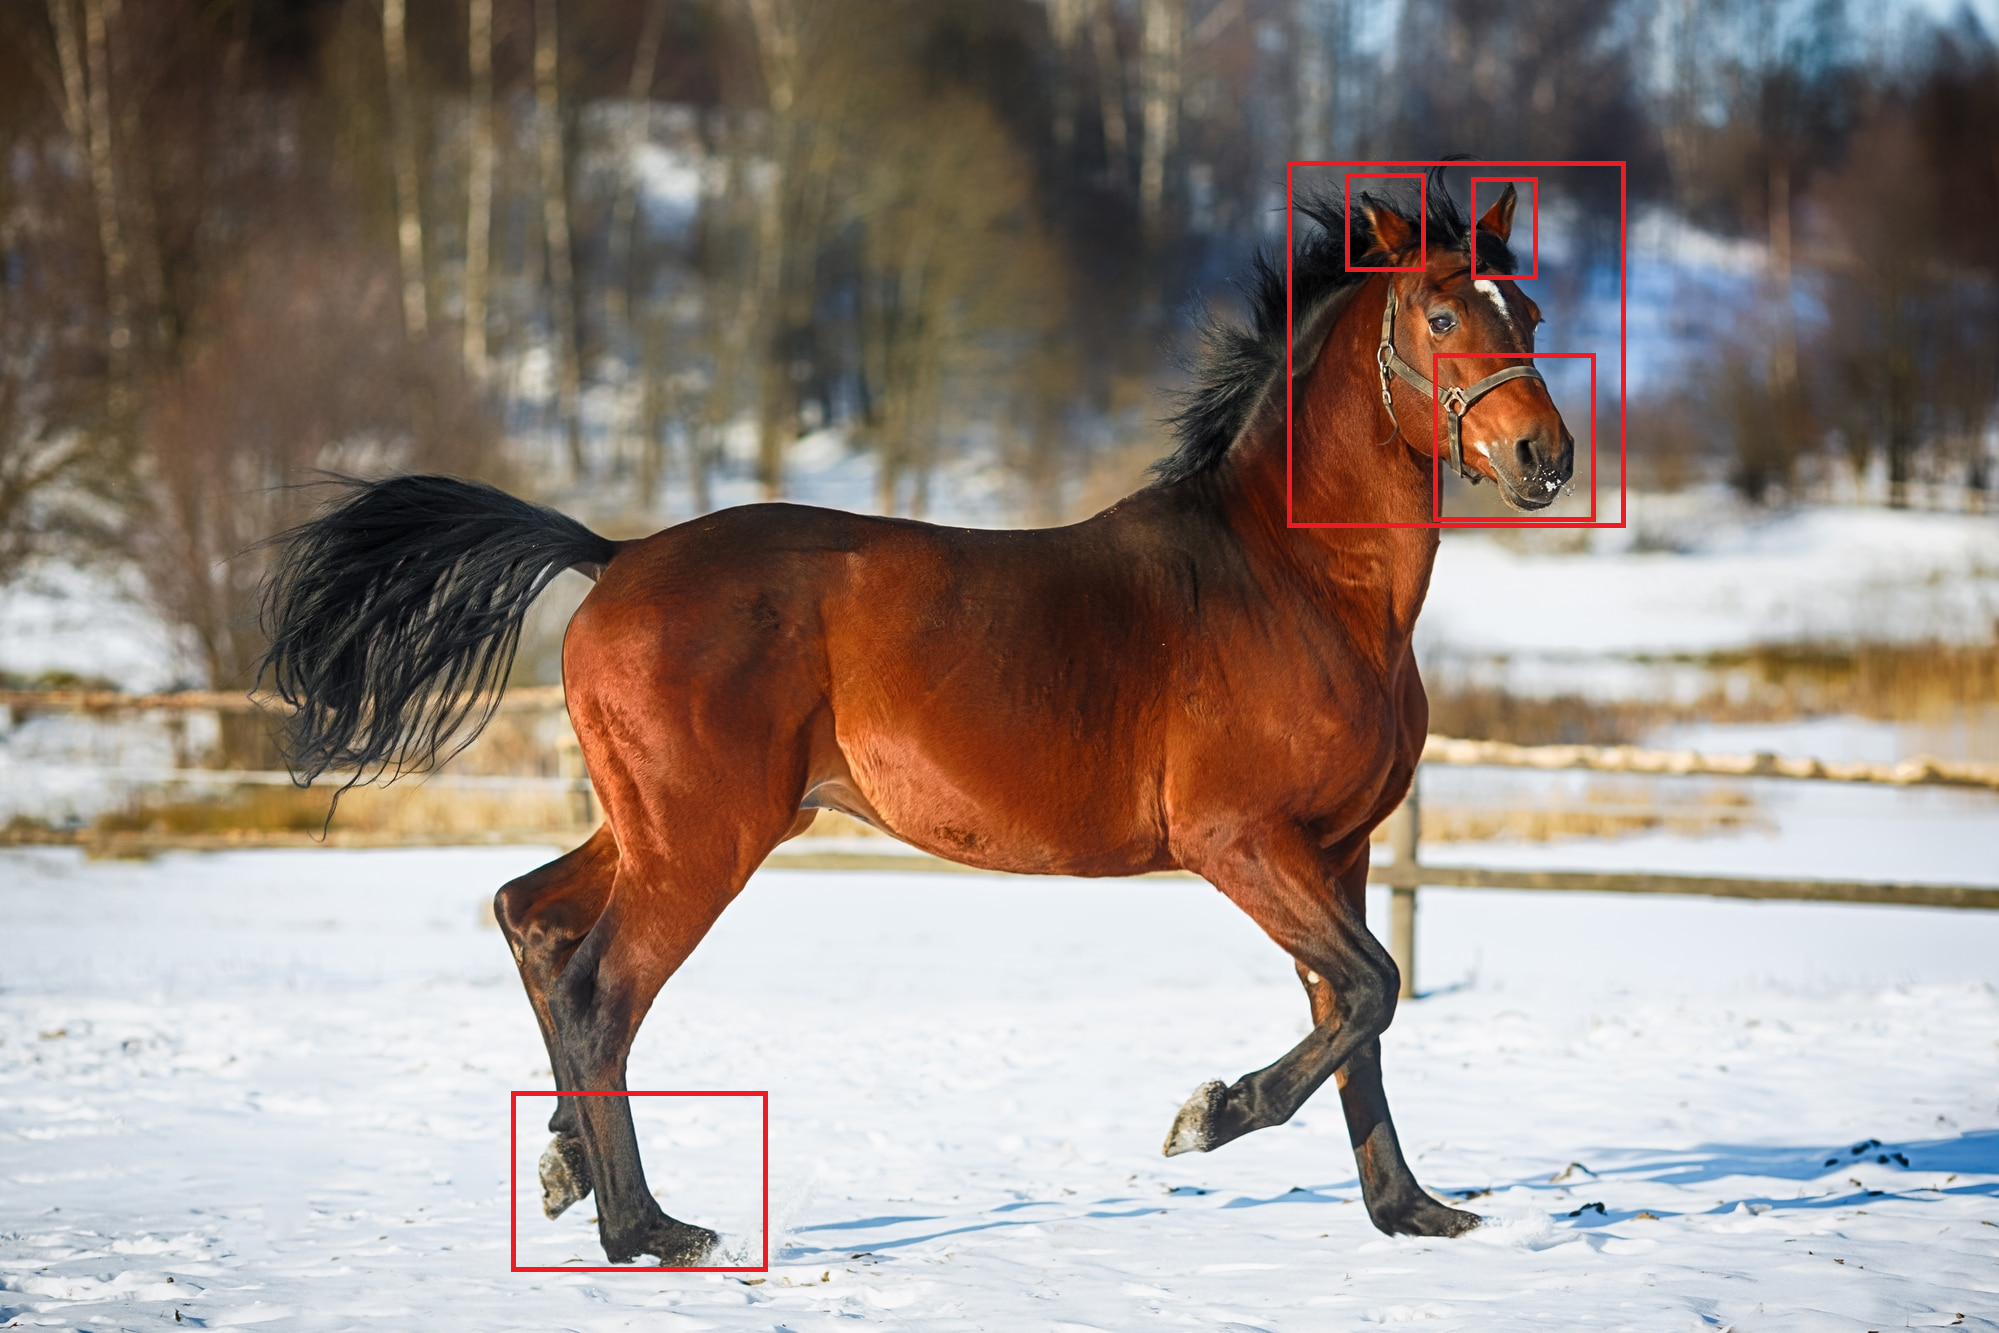

A densely connected neural network iditifies features globally. While useful, if new images are presented with a different orientation the model will have to relearn those key features. How can we improve the training model?

# Convolutional Neural Network
•	Unlike regular neural networks that treat images as a single large array of numbers, CNNs exploit the spatial relationships between pixels in an image.

**How is convolution achieved?**


*   They achieve this through a special layer called the convolutional layer, which applies filters (kernels) that slide across the image.
*  These filters are designed to detect specific features in the image, like edges, lines, or shapes.


**What are filters and how do they work?**


*   As the filter slides across the image, it calculates a score indicating how well the image patch matches the filter's pattern. This score is added to a feature map, which essentially becomes a map of where those patterns are found in the image.
*   A CNN will have many filters, each tuned to detect a different feature. Some early layers might focus on basic edges and lines, while later layers might look for more complex combinations like corners or blobs.

Imagine examining an image with a magnifying glass. By moving the magnifying glass around (convolution), you can focus on specific areas to see details like edges or textures (features) better. A CNN with multiple filters acts like having multiple magnifying glasses, each revealing different aspects of the image.



# **Stages of Machine Learning**



**1.   Data processing**


*   Collect relevant data that is grouped in buckets or classes representing the categories you wish to identify. (Horse, Person, Cow)

*   Training Set: This is the largest portion (typically 60-80% of the data) used to train the model. The model learns to identify patterns and relationships within the images in this set.
*   Validation Set: This is a smaller portion (usually 10-20% of the data) used to fine-tune the model during training. The model's performance on the validation set helps identify issues like overfitting or under fitting.
*   Test Set: This is the unseen data (remaining 10-20% or a completely separate set) used for final evaluation after training is complete. The model's performance on the test set reflects its generalizability to real-world scenarios.


**2.   Design/Build the model**.(Choose the appropriate architechture - CNN, RNN etc.)


**3.   Training stage**


*   Model is exposed to the data in bacthes which are shuffled each time to prevent overfitting. The number of times the model is exposed to the data set is known as an epoch.

*   Monitor performance: Track the model's performance on the validation set to avoid overfitting and ensure it generalizes well to unseen data.

*   Weights are adjusted throughout the training process to improve the accuracy of the model. Random weights are initially given prior to the commencment of the training process.

**4. Evaluate - How accurate is the model?**

**5. Monitor and maintain**





# **Unzip Data**

In [14]:
PATH = "AlzheimersClassification-main/AlzheimersData"

modelCheckpoints_dir = os.path.join(PATH, "ModelCheckpoints")
checkpoint_path = os.path.join(modelCheckpoints_dir, "/cp.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)
train_dir = os.path.join(PATH, 'train') #/content/AlzheimersClassification-main/AlzheimersData/train
test_dir = os.path.join(PATH, 'test')
val_dir = os.path.join(PATH, 'validation')

In [4]:
!unzip /content/AlzheimersClassification-main.zip

Streaming output truncated to the last 5000 lines.
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4b19eb86-57bf-49db-8c20-8318e1379edd.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4b448d1d-1de6-4f50-9afc-681a3d14ffc5.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4c277abf-54a3-4399-ac32-e89530ffedd1.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4c3e92d4-daba-4279-9077-3b6f89320477.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4c48a69f-fab4-4d03-b14b-9c4142e746c9.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4c5002c2-e932-4f14-9c78-470d3bb1eb6a.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildDemented/4c7fe235-af2f-4769-9214-5870ac26345a.jpg  
  inflating: AlzheimersClassification-main/AlzheimersData/validation/MildD

# **Set Variables**

In [23]:
BATCH_SIZE = 32
EPOCHS = 8
IMG_HEIGHT = 150
IMG_WIDTH = 150


def count_files(direct):
    counts = []
    for subfolder in os.listdir(direct):
        subfolder_path = os.path.join(direct, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = len([f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))])
            counts.append(file_count)
    return counts
TOTAL_TRAIN_DATA = sum(count_files(train_dir))
TOTAL_TEST_DATA = sum(count_files(test_dir))
TOTAL_VAL_DATA = sum(count_files(val_dir))
print(TOTAL_TRAIN_DATA, TOTAL_TEST_DATA, TOTAL_VAL_DATA)

27188 6400 6797


# **Build and Train the Model**

**Create image scanners and batchers**

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./300)
val_image_generator = ImageDataGenerator(rescale=1./300)
test_image_generator = ImageDataGenerator(rescale=1./300)


train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           batch_size = BATCH_SIZE,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')
val_data_gen = val_image_generator.flow_from_directory(val_dir,
                                                       batch_size = BATCH_SIZE,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'categorical')
test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                         batch_size = BATCH_SIZE,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode = None,
                                                         shuffle = False)

for data_batch in test_data_gen:
    print('IMG Shape:', data_batch.shape[1:])
    break

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.
IMG Shape: (150, 150, 3)


# **Displaying Images**

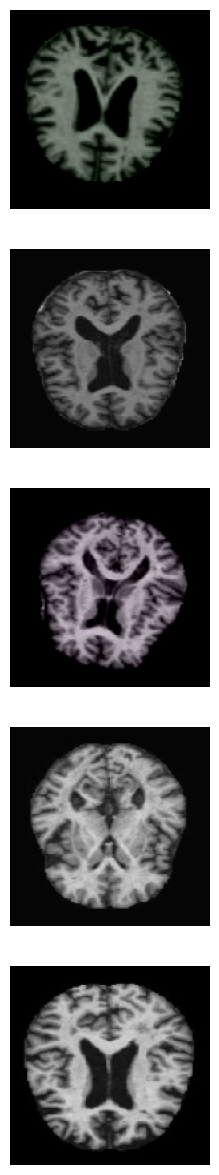

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
      ax.imshow(img)
      ax.axis('off')

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

# **Building the Model**

In [21]:
# Save Weights While Training
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(checkpoint_dir, "model.keras"),
                                                 verbose=1)

In [26]:
model = keras.Sequential()
model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(3,3) represents our filter of a 3 x 3 matrix
model.add(layers.MaxPooling2D((2, 2))) #reduces the size of the image by half
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  #creates a single dimensional array of pixel values
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #4 output nodes represents 1 of the 4 classes. softmax function generates probabilisitic distribution.

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,404 (1.38 MB)

 Trainable params: 362,404 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

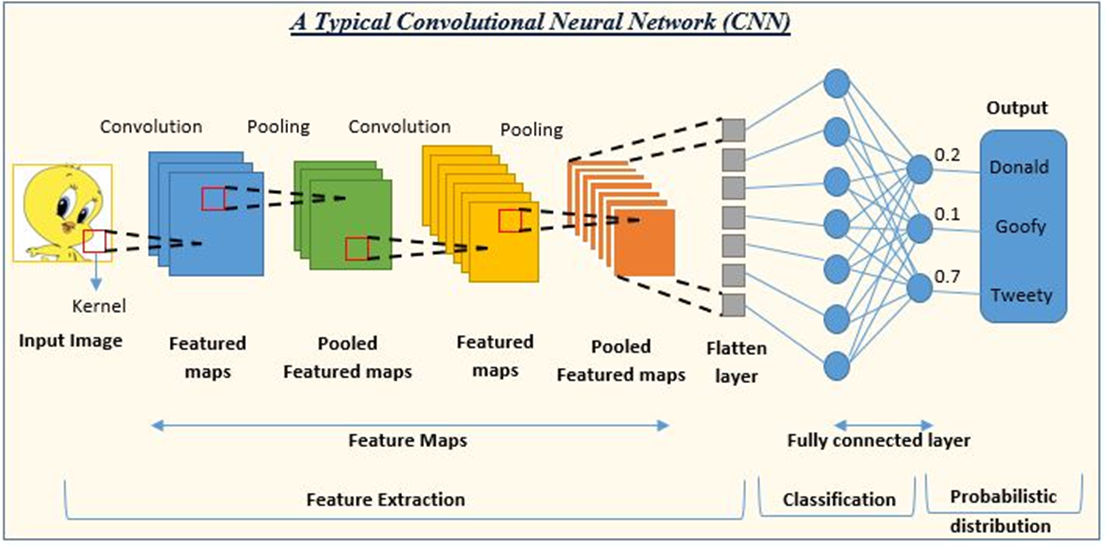

Source: https://www.analyticsvidhya.com/blog/2022/01/convolutional-neural-network-an-overview/




# **What is a Rectified Linear Unit? "ReLu"**

In a Convolutional Neural Network (CNN), a rectified linear unit (ReLU) acts as an activation function within a neuron. It's applied to the output from the convolution operation performed by filters.


Convolution itself is a linear operation. While it's effective for extracting basic features, CNNs need to learn more complex relationships between features for tasks like image recognition.


ReLU is a simple function that sets any negative value from the convolution output to zero and leaves positive values unchanged.


ReLU in a CNN helps introduce non-linearity into the network, allowing it to learn more complex features and ultimately improve its ability to perform tasks like image classification.

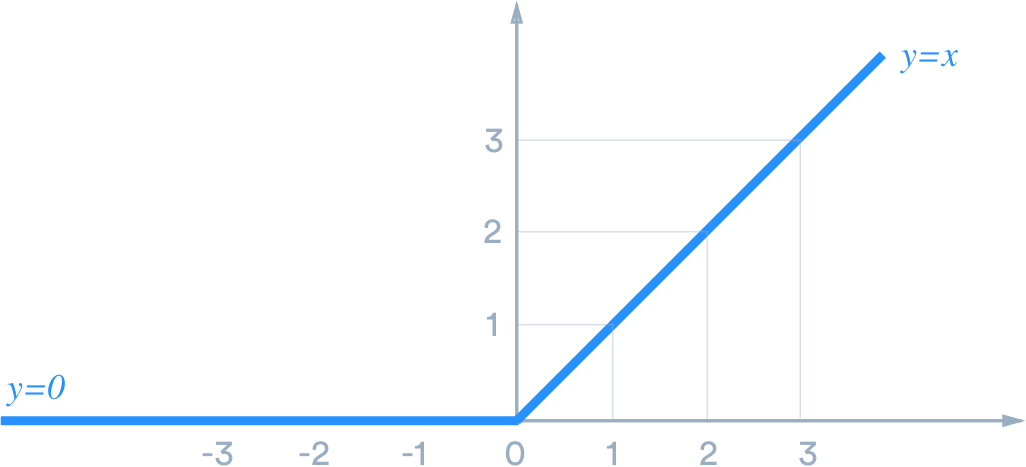


# **Pooling**

Feature maps produced by the filters of Convolutional layers are location-dependent.

If an object in an image has shifted a bit it might not be recognizable by the Convolutional layer. The feature map records the precise positions of features in the input.

What pooling layers provide is “Translational Invariance” which makes the CNN invariant to translations, i.e., even if the input of the CNN is translated, the CNN will still be able to recognize the features in the input.


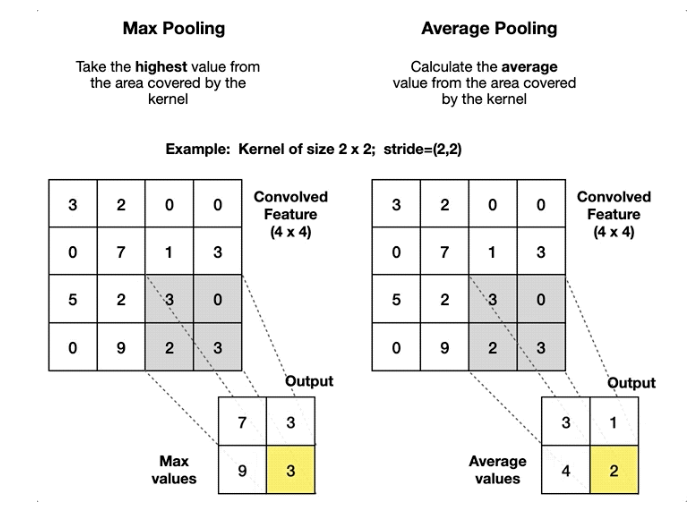




# **Max vs. Average Pooling**

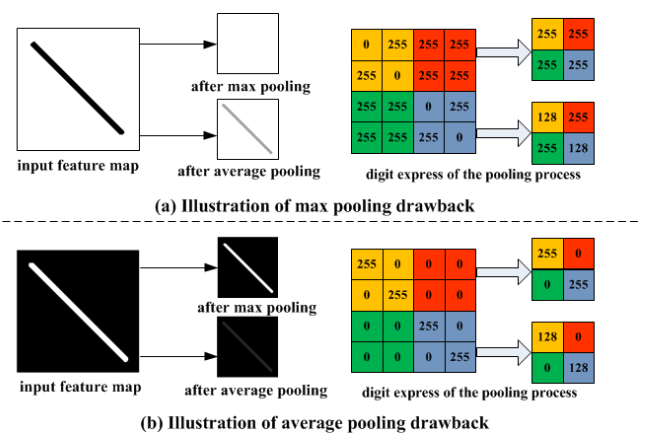

Source: https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn

# **Gradient Descent**


Picture a landscape with hills and valleys, where the valleys represent lower loss (better performance) for your CNN, and the hills represent higher loss.

Gradient descent acts like a ball rolling down this landscape. The ball starts at a random point (initial weights and biases) and iteratively rolls downhill in the direction of the steepest descent (the negative gradient). This process continues until the ball reaches a valley (local minimum), which represents the best configuration for the CNN's weights and biases found so far during training.

The steepness of the slope/gradient represents how fast the model is learning. A steeper slope means large reductions in error are being made and the model is learning fast, whereas if the slope is zero the model is on a plateau and isn't learning.

**Adam is a specialized type of gradient descent that dynamically changes the learning rate.**

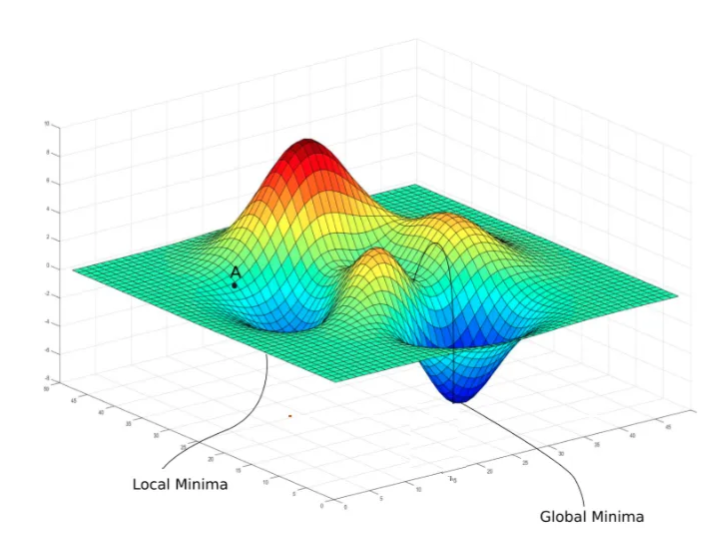


# **Categorical crossentropy**

Categorical crossentropy is a loss function commonly used in neural networks for multi-class classification problems. It helps the network learn by measuring the difference between the predicted probabilities and the actual probabilities for each class.

1. Multi-class Classification:
Imagine you're training a neural network to classify images containing different types of animals (cats, dogs, birds). Categorical crossentropy is suited for this scenario because it deals with multiple categories (more than two).
2. Predicted vs. Actual Probabilities:

*  After processing an image an output of a set of values for each class is generated. These values represent the predicted probabilities of the image belonging to each category (e.g., 70% chance of being a cat, 20% dog, 10% bird).
*   Categorical crossentropy compares these predicted probabilities with the actual probabilities.

# **SoftMax**

Softmax is a function commonly used in machine learning, particularly in tasks involving multi-class classification.

*   Converting Numbers to Probabilities: Imagine you have a neural network that
outputs a set of numbers for different categories. The softmax function takes these numbers and transforms them into a set of probabilities between 0 and 1, where each probability represents the likelihood of the input belonging to a specific category.
*   Multi-class vs. Binary Classification: It's important to distinguish softmax from the sigmoid function, which is used for binary classification (two categories). Softmax handles situations with multiple categories, ensuring the sum of all the probabilities adds up to 1.




# **Training the Model**

In [27]:
history = model.fit(train_data_gen, epochs=EPOCHS, steps_per_epoch=TOTAL_TRAIN_DATA//BATCH_SIZE, validation_data=val_data_gen, validation_steps=TOTAL_VAL_DATA//BATCH_SIZE)


Epoch 1/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 589s 691ms/step - accuracy: 0.4216 - loss: 1.1702 - val_accuracy: 0.6732 - val_loss: 0.7172
Epoch 2/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 124us/step - accuracy: 0.6875 - loss: 0.6601 - val_accuracy: 0.9167 - val_loss: 0.3960
Epoch 3/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 537s 633ms/step - accuracy: 0.7319 - loss: 0.5930 - val_accuracy: 0.7841 - val_loss: 0.5166
Epoch 4/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 80us/step - accuracy: 0.7500 - loss: 0.4113 - val_accuracy: 0.7500 - val_loss: 0.4520
Epoch 5/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 536s 631ms/step - accuracy: 0.8292 - loss: 0.4054 - val_accuracy: 0.8452 - val_loss: 0.3902
Epoch 6/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 99us/step - accuracy: 0.9375 - loss: 0.2184 - val_accuracy: 0.6667 - val_loss: 0.6771
Epoch 7/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 535s 630ms/step - accuracy: 0.8881 - loss: 0.2829 - val_accuracy: 0.8535 - val_loss: 0.3715
Epoch 8/8
849/849 ━━━━━━━━━━━━━━━━━━━━ 1s 86us/step - accuracy: 0.9062 - loss: 0.2868 - val

In [ ]:
!pip install --upgrade keras

# **Loading the saved Model**

In [ ]:
model = tf.keras.models.load_model(os.path.join(PATH, 'ModelCheckpoints', 'model.keras'), custom_objects={'InputLayer': tf.keras.layers.Input})

# **Plot Model Performance**

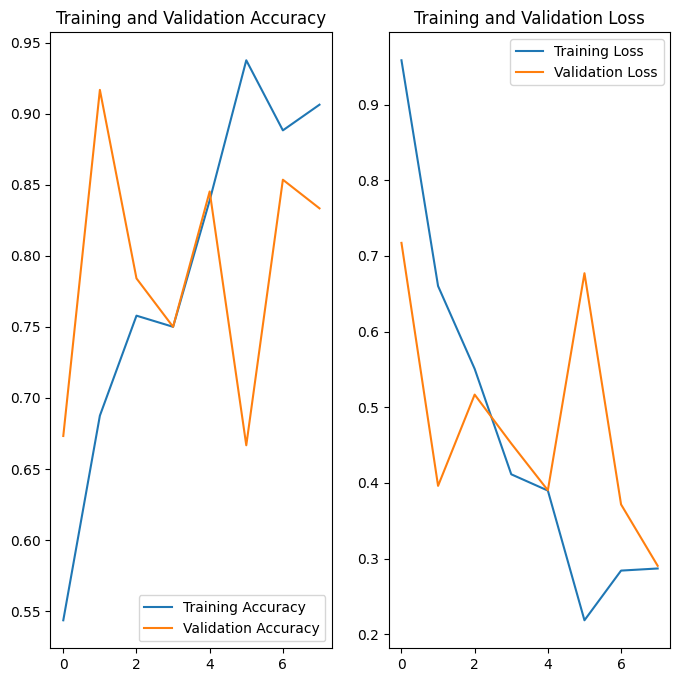

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Look at Predictions**

In [29]:
predictions = model.predict(test_data_gen, steps=len(test_data_gen), verbose=1)
print(predictions[:5])

200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step
[[9.9998224e-01 1.7326611e-05 2.8854217e-07 2.3273695e-07]
 [9.9999726e-01 2.7777012e-06 2.2676664e-08 1.7337555e-08]
 [9.9999750e-01 2.4812662e-06 1.9385622e-08 1.4772548e-08]
 [9.9999988e-01 4.9960324e-08 3.0482695e-08 2.0360462e-08]
 [9.9999797e-01 1.9671875e-06 1.4040687e-08 1.0627109e-08]]


# **Testing Model**

**Prediction Functions**

In [41]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img
def getPrediction(preds):
    pred_key = ['Demented', 'MildDemented', 'NonDemented', 'VeryMildDemented']
    prediction = np.argmax(preds)
    return pred_key[prediction]
def predict(img_path):
    input_image = preprocess_image(img_path)
    pred = model.predict(input_image)
    prediction = getPrediction(pred)

    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Prediction: ' + prediction)
    plt.axis('off')
    plt.show()

    print(f'Actual: {os.path.abspath(img_path).split("\\")[-2]}')
    print(img_path)
    return prediction


# **Predict Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


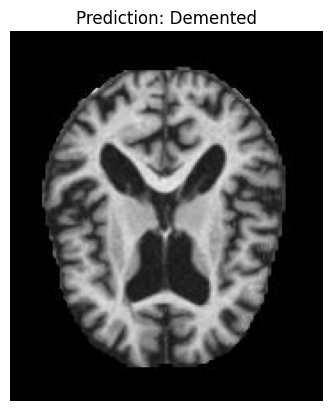

Actual: Demented
AlzheimersClassification-main/AlzheimersData\test\Demented\Demented032032.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


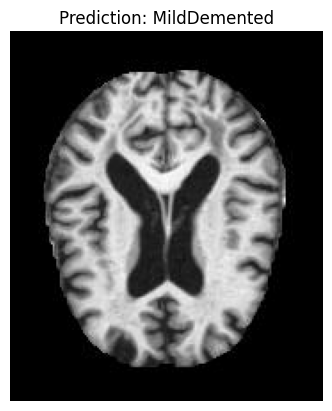

Actual: MildDemented
AlzheimersClassification-main/AlzheimersData\test\MildDemented\mildDem548.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


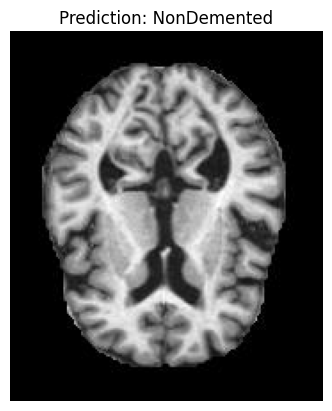

Actual: NonDemented
AlzheimersClassification-main/AlzheimersData\test\NonDemented\nonDem699.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


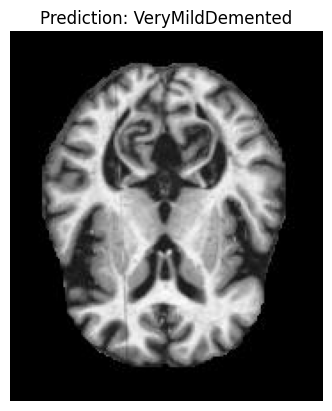

Actual: VeryMildDemented
AlzheimersClassification-main/AlzheimersData\test\VeryMildDemented\verymildDem396.jpg


In [43]:
directories = os.listdir(test_dir)[1:]
for i in range(len(directories)):
    directories[i] = os.path.join(test_dir, directories[i])
for directory in directories:
    img_path = os.path.join(directory, random.choice(os.listdir(directory)))
    predict(img_path)


In [ ]:
!rm '/content/AlzheimersClassification-main/AlzheimersData/test/.DS_Store'

# **Save Model Weights**

In [ ]:
model.save('model.keras')